In [61]:
#importing packages
import numpy as np
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime
%matplotlib inline
path = 'C:/Users/rithesh/Desktop/Reo/'
g_df=pd.read_csv(path+'data_source.csv')

C:\Users\rithesh\Anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
g_df.head()

,case_number,visa_class,case_status,employer_name,employer_business_dba,employer_address,employer_city,employer_state,employer_postal_code,employer_country,...,new_concurrent_employment,change_employer,amended_petition,pw_wage_level,pw_source,pw_source_year,pw_source_other,support_h1b,labor_con_agree,public_disclosure_location
0,I-200-17060-115035,H-1B,CERTIFIED,"SIMERICS, INC.",NaN,1750 112TH AVENUE NE,BELLEVUE,WA,98004,UNITED STATES OF AMERICA,...,0.0,0.0,0.0,Level II,Other,2016.0,OFLC ONLINE DATA CENTER,NaN,NaN,NaN
1,I-200-17060-521850,H-1B,CERTIFIED,"MIZUHO BANK, LTD.",NaN,1251 AVENUE OF THE AMERICAS,NEW YORK,NY,10020,UNITED STATES OF AMERICA,...,0.0,0.0,0.0,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,NaN,NaN,NaN
2,I-200-17060-438863,H-1B,CERTIFIED,TATA CONSULTANCY SERVICES LIMITED,NaN,9201 CORPORATE BOULEVARD,ROCKVILLE,MD,20850,UNITED STATES OF AMERICA,...,0.0,0.0,0.0,Level II,OES,2016.0,OFLC ONLINE DATA CENTER,Y,NaN,NaN
3,I-200-17060-312033,H-1B,CERTIFIED,"STRATEGIC RESOURCES INTERNATIONAL, INC.",NaN,777 WASHINGTON RD,PARLIN,NJ,08859,UNITED STATES OF AMERICA,...,0.0,0.0,0.0,Level I,Other,2016.0,OFLC ONLINE DATA CENTER,Y,Y,NaN
4,I-200-17060-336602,H-1B,CERTIFIED,"EAPT SOLUTIONS, INC.",NaN,5 VAUGHN STREET,PRINCETON,NJ,08540,UNITED STATES OF AMERICA,...,0.0,1.0,0.0,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,Y,NaN,NaN


In [63]:
print("Loaded:", g_df.shape[1],"columns and",g_df.shape[0],"rows of data")

Loaded: 52 columns and 624650 rows of data


In [4]:
print(g_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 52 columns):
case_number                    624650 non-null object
visa_class                     624650 non-null object
case_status                    624650 non-null object
employer_name                  624594 non-null object
employer_business_dba          43270 non-null object
employer_address               624643 non-null object
employer_city                  624635 non-null object
employer_state                 624632 non-null object
employer_postal_code           624632 non-null object
employer_country               528143 non-null object
employer_province              6116 non-null object
employer_phone                 528142 non-null object
employer_phone_ext             27872 non-null object
naics_industry_code            624643 non-null object
soc_name                       624647 non-null object
soc_code                       624648 non-null object
job_title                    

In [5]:
g_df.describe()

,total_workers,prevailing_wage,wage_rate_of_pay_from,wage_rate_of_pay_to,new_employment,continued_employment,change_previous_employment,new_concurrent_employment,change_employer,amended_petition,pw_source_year,public_disclosure_location
count,624650.000000,6.246490e+05,6.246500e+05,6.246490e+05,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624605.000000,0.0
mean,1.893800,7.321117e+04,8.285702e+04,2.416596e+04,0.834251,0.326300,0.130657,0.008979,0.259485,0.332703,2016.167059,NaN
std,4.826703,2.574025e+05,4.266316e+04,5.255090e+04,3.556236,1.243793,0.955791,0.157690,1.095563,1.418231,5.128159,NaN
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,5.682600e+04,6.300000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,NaN
50%,1.000000,7.022100e+04,7.600000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,NaN
75%,1.000000,8.914900e+04,1.000000e+05,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,NaN
max,155.000000,2.016227e+08,1.688000e+06,3.000000e+06,150.000000,55.000000,50.000000,50.000000,150.000000,50.000000,2017.000000,NaN


In [64]:
#Taking a look at null values
missing_data = pd.DataFrame({'total_missing': g_df.isnull().sum(), 'perc_missing': (g_df.isnull().mean())})
missing_data

,perc_missing,total_missing
case_number,0.000000,0
visa_class,0.000000,0
case_status,0.000000,0
employer_name,0.000090,56
employer_business_dba,0.930729,581380
employer_address,0.000011,7
employer_city,0.000024,15
employer_state,0.000029,18
employer_postal_code,0.000029,18
employer_country,0.154498,96507


In [65]:
#dropping columns with more than 90% of data missing
drop_list=['public_disclosure_location','original_cert_date','employer_business_dba','employer_province','employer_phone_ext']
g_df=g_df.drop(drop_list,axis=1)


In [66]:
g_df.dtypes
print("Loaded:", g_df.shape[1],"columns and",g_df.shape[0],"rows of data")

Loaded: 47 columns and 624650 rows of data


In [67]:
#Exploring categorical variables
t= g_df[['visa_class','employer_name','pw_source','pw_source_other','employer_city','employer_state','employer_country','soc_name','job_title','full_time_position','pw_unit_of_pay','wage_unit_of_pay','worksite_city','worksite_county','worksite_state','agent_representing_employer','agent_attorney_state','h1b_dependent','willful_violator']]
t.describe()

,visa_class,employer_name,pw_source,pw_source_other,employer_city,employer_state,employer_country,soc_name,job_title,full_time_position,pw_unit_of_pay,wage_unit_of_pay,worksite_city,worksite_county,worksite_state,agent_representing_employer,agent_attorney_state,h1b_dependent,willful_violator
count,624650,624594,624604,618278,624635,624632,528143,624647,624645,624645,624604,624642,624637,623471,624641,528144,336009,610908,610905
unique,4,71170,5,3083,5123,57,5,867,93012,2,5,5,7963,3691,57,2,55,2,2
top,H-1B,INFOSYS LIMITED,OES,OFLC ONLINE DATA CENTER,PLANO,CA,UNITED STATES OF AMERICA,"SOFTWARE DEVELOPERS, APPLICATIONS",PROGRAMMER ANALYST,Y,Year,Year,NEW YORK,SANTA CLARA,CA,Y,CA,N,N
freq,610304,20587,504806,580142,34320,105701,528132,124507,47151,610769,585301,585417,37722,41862,119409,351346,66643,377051,610428


In [334]:
#Looks like data is very messy, see below several representations of NEW YORK county with different spellings and variations 
t2=g_df[['worksite_city','worksite_county','worksite_state']].loc[g_df['worksite_city'] =='NEW YORK']
t3=t2.loc[t2['worksite_county'] !='NEW YORK']
t3['worksite_county'].value_counts()

NEW YORK COUNTY                415
NY                             410
MANHATTAN                      102
KINGS                           72
NEW YORK CITY                   33
UNITED STATES OF AMERICA        26
NASSAU                          25
QUEENS                          19
BRONX                           15
WESTCHESTER                     14
NY - NEW YORK                   13
NEW  YORK                       11
NEWYORK                          7
HUDSON                           6
NEW YORK (NY)                    6
SUFFOLK                          5
KING                             5
NW YORK                          3
NEW YROK                         3
MANHATTAN (NEW YORK CO)          3
SARATOGA                         2
BROOKLYN                         2
NEW YORKK                        2
NEW YORK CITY COUNTY             2
NEW YORRK                        2
NEW YORK- KINGS BOROUGH          2
NEY YORK                         2
NEW YORK COUNTY (MANHATTAN)      2
ALBANY              

In [335]:
t2=g_df[['worksite_city','worksite_county','worksite_state']].loc[g_df['worksite_state'] =='NY']
#t3=t2.loc[t2['worksite_county'] !='NEW YORK']
t2['worksite_city'].value_counts()[:100]


NEW YORK              37647
BROOKLYN               2023
ALBANY                 1004
LONG ISLAND CITY        721
BRONX                   713
MELVILLE                680
ROCHESTER               672
BUFFALO                 621
FLUSHING                496
SYRACUSE                390
NEW YORK CITY           378
WHITE PLAINS            358
MALTA                   338
SCHENECTADY             268
BETHPAGE                258
HAUPPAUGE               211
PURCHASE                198
ITHACA                  195
PORT WASHINGTON         190
RENSSELAER              189
WEBSTER                 187
UPTON                   178
ARMONK                  145
YORKTOWN HEIGHTS        140
TARRYTOWN               138
HICKSVILLE              133
TROY                    126
STONY BROOK             122
HOLTSVILLE              111
RYE                     103
                      ...  
COOPERSTOWN              41
NISKAYUNA                41
NY                       41
PEARL RIVER              41
CLIFTON PARK        

In [68]:
# There are five wage units
g_df['wage_unit_of_pay'].unique()

array(['Year', 'Hour', 'Week', 'Bi-Weekly', 'Month', nan], dtype=object)

In [69]:
g_df['new_employment'].unique()

array([   1.,    0.,    3.,   10.,   20.,    2.,    6.,    5.,    8.,
          4.,   15.,   25.,   40.,   30.,   12.,    7.,   11.,    9.,
         21.,   16.,  100.,   50.,   27.,   17.,   13.,   14.,   28.,
         35.,   45.,   60.,   99.,   65.,   75.,   80.,  150.,   18.,
        110.,   70.,   24.,   54.,   33.,   26.,   41.,   38.,   34.,
         55.,   22.,   29.,   32.,   19.])

In [70]:
g_df['continued_employment'].unique()

array([  0.,   1.,   9.,   4.,   2.,   5.,   3.,  10.,   8.,  15.,  25.,
        20.,  30.,  14.,  28.,  50.,   6.,  55.,  22.,  18.,  40.,   7.,
        17.,  12.,  35.])

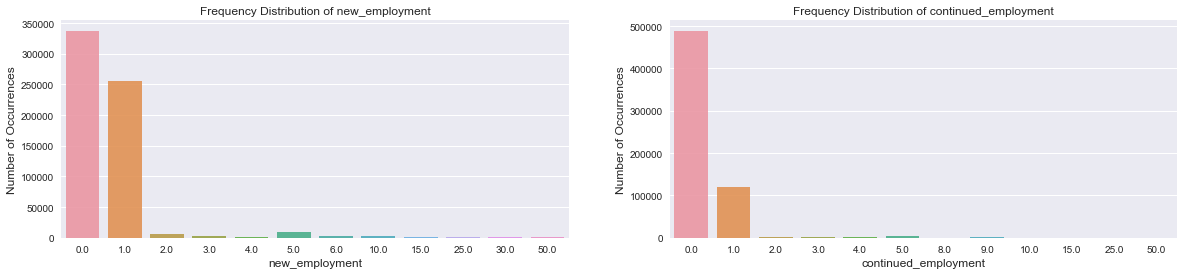

In [337]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
carrier_count = g_df['new_employment'].value_counts()[:50]
sns.set(style="darkgrid")
sns.barplot(carrier_count.index,carrier_count.values, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of new_employment')
ax[0].set_ylabel('Number of Occurrences', fontsize=12)
ax[0].set_xlabel('new_employment', fontsize=12)

color_count = g_df['continued_employment'].value_counts()[:50]
sns.set(style="darkgrid")
sns.barplot(color_count.index,color_count.values, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of continued_employment')
ax[1].set_ylabel('Number of Occurrences', fontsize=12)
ax[1].set_xlabel('continued_employment', fontsize=12)
plt.show()

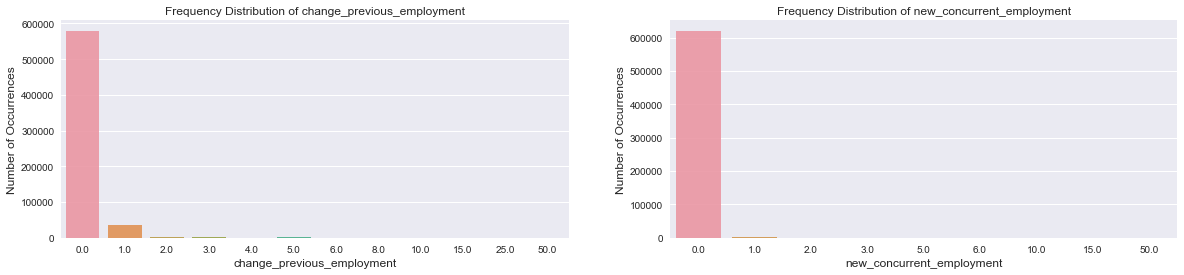

In [338]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
carrier_count = g_df['change_previous_employment'].value_counts()[:50]
sns.set(style="darkgrid")
sns.barplot(carrier_count.index,carrier_count.values, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of change_previous_employment')
ax[0].set_ylabel('Number of Occurrences', fontsize=12)
ax[0].set_xlabel('change_previous_employment', fontsize=12)

color_count = g_df['new_concurrent_employment'].value_counts()[:50]
sns.set(style="darkgrid")
sns.barplot(color_count.index,color_count.values, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of new_concurrent_employment')
ax[1].set_ylabel('Number of Occurrences', fontsize=12)
ax[1].set_xlabel('new_concurrent_employment', fontsize=12)
plt.show()

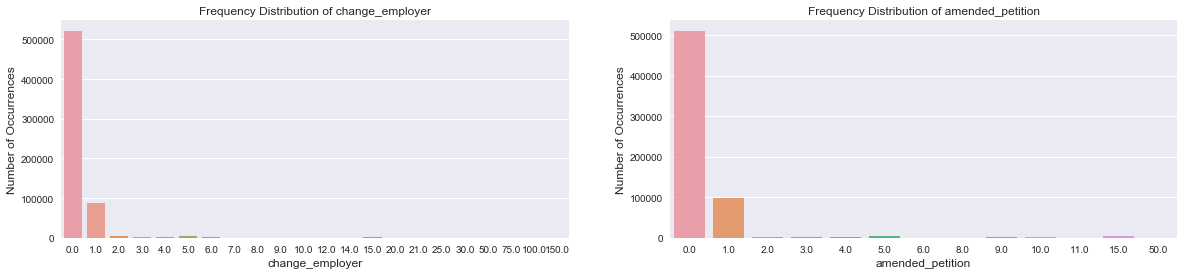

In [339]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
carrier_count = g_df['change_employer'].value_counts()[:100]
sns.set(style="darkgrid")
sns.barplot(carrier_count.index,carrier_count.values, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of change_employer')
ax[0].set_ylabel('Number of Occurrences', fontsize=12)
ax[0].set_xlabel('change_employer', fontsize=12)

color_count = g_df['amended_petition'].value_counts()[:50]
sns.set(style="darkgrid")
sns.barplot(color_count.index,color_count.values, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of amended_petition')
ax[1].set_ylabel('Number of Occurrences', fontsize=12)
ax[1].set_xlabel('amended_petition', fontsize=12)
plt.show()

In [25]:
#Creating a new column called yearly_wage to calculate wages on a yearly basis
#wage_map={'Year':1,'Hour': 2160, 'Week': 54, 'Bi-Weekly': 27,'Month': 12}
#g_df['wage_ind'] =g_df['wage_unit_of_pay'].map(wage_map)


In [71]:
#Creating a new column called yearly_wage to calculate wages on a yearly basis (Assuming 365 days exists in a year and 40 working hours per week)
wage_ind = []
for index, row in g_df.iterrows():
    if row['wage_unit_of_pay'] in ['Year'] :
        wage_ind.append(1)
    elif row['wage_unit_of_pay'] in['Hour'] :
        wage_ind.append(2080)
    elif row['wage_unit_of_pay'] in ['Week']:
        wage_ind.append(52)
    elif row['wage_unit_of_pay'] in ['Bi-Weekly'] :
        wage_ind.append(26)
    elif row['wage_unit_of_pay'] in ['Month'] :
        wage_ind.append(12)
    else:
        wage_ind.append(0)

g_df['wage_ind'] = wage_ind
g_df['yearly_wage'] = g_df['prevailing_wage'] * g_df['wage_ind']

In [14]:
drop_list=['pw_source_year','new_employment','continued_employment','change_previous_employment','new_concurrent_employment','change_employer','prevailing_wage','wage_rate_of_pay_from','wage_rate_of_pay_to','total_workers']
g_df.drop(drop_list, axis=1)
g_df.describe()

,total_workers,prevailing_wage,wage_rate_of_pay_from,wage_rate_of_pay_to,new_employment,continued_employment,change_previous_employment,new_concurrent_employment,change_employer,amended_petition,pw_source_year,wage_ind
count,624650.000000,6.246490e+05,6.246500e+05,6.246490e+05,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624605.000000,624650.000000
mean,1.893800,7.321117e+04,8.285702e+04,2.416596e+04,0.834251,0.326300,0.130657,0.008979,0.259485,0.332703,2016.167059,128.851352
std,4.826703,2.574025e+05,4.266316e+04,5.255090e+04,3.556236,1.243793,0.955791,0.157690,1.095563,1.418231,5.128159,499.396958
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.682600e+04,6.300000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000
50%,1.000000,7.022100e+04,7.600000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000
75%,1.000000,8.914900e+04,1.000000e+05,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000
max,155.000000,2.016227e+08,1.688000e+06,3.000000e+06,150.000000,55.000000,50.000000,50.000000,150.000000,50.000000,2017.000000,2080.000000


In [72]:
print("Min dates:")
print(g_df[['decision_date','case_submitted']].min())
print("Max dates:")
print(g_df[['decision_date','case_submitted']].max())
# We see that the data is case submission date is backed to 2011

Min dates:
decision_date     2016-09-30
case_submitted    2011-03-22
dtype: object
Max dates:
decision_date     2017-09-29
case_submitted    2017-09-28
dtype: object


In [16]:
#Lets see how many records are available 
g_df[['decision_date','case_submitted']].loc[g_df['case_submitted'] < '2013-01-01']

,decision_date,case_submitted
18228,2017-03-09,2011-03-27
49206,2016-10-17,2012-02-16
315546,2017-03-19,2012-05-31
415550,2017-04-05,2012-07-08
427280,2017-04-13,2011-03-22
427281,2017-04-13,2012-03-21
427282,2017-04-13,2012-03-21
427283,2017-04-13,2012-06-18
427284,2017-04-13,2012-08-20
427285,2017-04-13,2012-10-11


['H-1B' 'E-3 Australian' 'H-1B1 Singapore' 'H-1B1 Chile']
[610304  12157   1254    935]


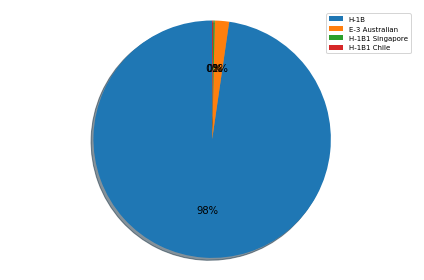

In [17]:
# 4 visa class applications
statusCount = g_df['visa_class'].value_counts()
statusTypes = statusCount.index.copy(deep=True)
statusTypes = statusTypes.values
statusTypes = statusTypes[0:5]

statusValues = statusCount.copy()
statusValues = statusValues.values
statusValues = statusValues[0:5]
print(statusTypes)
print(statusValues)

fig1 = plt.pie(statusValues, autopct='%2.0f%%', shadow=True, startangle=90)
plt.legend(statusTypes, loc="best", prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

['CERTIFIED' 'CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'DENIED']
[545694  49704  20772   8480]


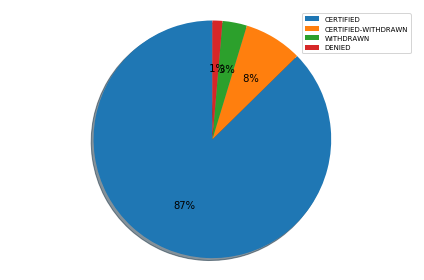

In [18]:
# 4 case_status for H1B applications
statusCount = g_df['case_status'].value_counts()
statusTypes = statusCount.index.copy(deep=True)
statusTypes = statusTypes.values
statusTypes = statusTypes[0:5]

statusValues = statusCount.copy()
statusValues = statusValues.values
statusValues = statusValues[0:5]
print(statusTypes)
print(statusValues)

fig1 = plt.pie(statusValues, autopct='%2.0f%%', shadow=True, startangle=90)
plt.legend(statusTypes, loc="best", prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5,1,'Frequency distribution')

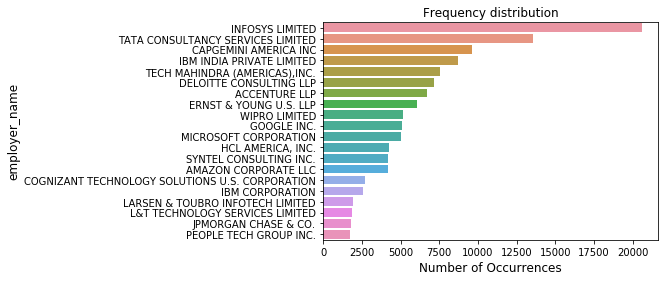

In [19]:
employer=g_df['employer_name'].value_counts()[:20]
sns.barplot(x= employer.values, y = employer.index)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('employer_name', fontsize=12)
plt.title('Frequency distribution',fontsize=12)

Text(0.5,1,'Frequency distribution')

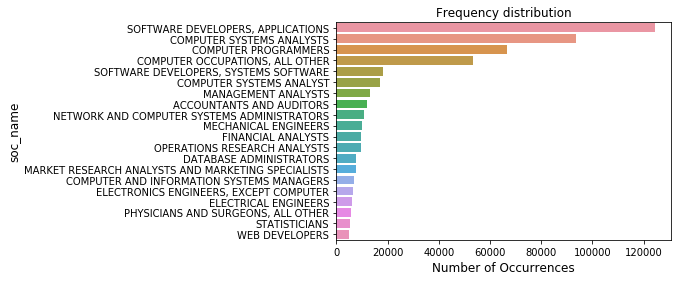

In [20]:
soc=g_df['soc_name'].value_counts()[:20]
sns.barplot(x= soc.values, y = soc.index)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('soc_name', fontsize=12)
plt.title('Frequency distribution',fontsize=12)

Text(0.5,1,'Frequency distribution')

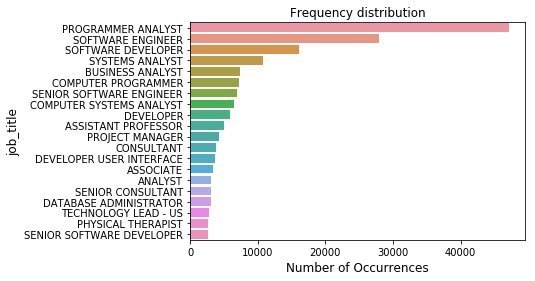

In [21]:
jt=g_df['job_title'].value_counts()[:20]
sns.barplot(x= jt.values, y = jt.index)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('job_title', fontsize=12)
plt.title('Frequency distribution',fontsize=12)


Text(0.5,1,'Frequency distribution')

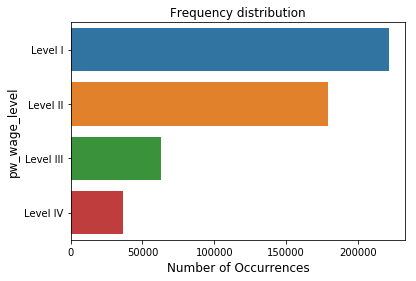

In [22]:
level=g_df['pw_wage_level'].value_counts()[:20]
sns.barplot(x= level.values, y = level.index)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('pw_wage_level', fontsize=12)
plt.title('Frequency distribution',fontsize=12)


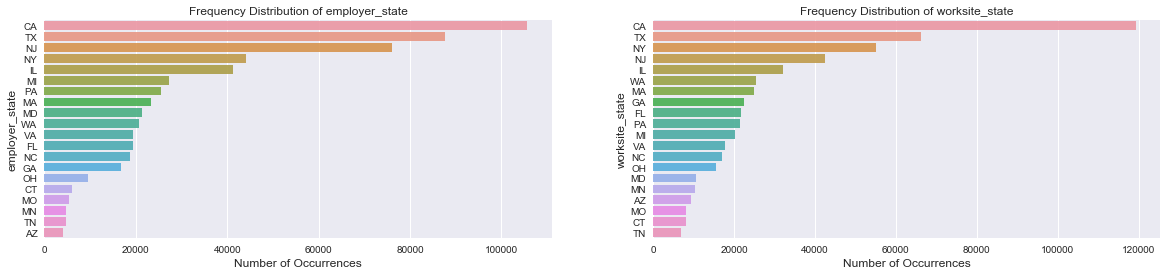

In [348]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
carrier_count = g_df['employer_state'].value_counts()[:20]
sns.set(style="darkgrid")
sns.barplot(carrier_count.values,carrier_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of employer_state')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('employer_state', fontsize=12)

color_count = g_df['worksite_state'].value_counts()[:20]
sns.set(style="darkgrid")
sns.barplot(color_count.values,color_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of worksite_state')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('worksite_state', fontsize=12)
plt.show()

Most of the above graphs are self explanatory, 
Few comments:

1.There are a maximum of 155 workers, I suppose each row represents a H1B petition filed for a worker and there exists unique case numbers for every petition filed, any value above than 1 could possibly be an error
2. From the data, I see that prevailing wage is always lower or equal to wage_rate_of_pay_from
3. For features related to employment, example new_employment, continued_employement, amend_petiton etc, I suppose was a indicator (1 or 0) to differentiate between H1B extension and H1B transfer/H1B filing for first time etc, not sure what does different values mean
4. We see that case submissions dates go back to 2011 and ~20 records are available with this information and  decision date for such records is in 2017, looks like such records are wrong inputs
5. 98% of applications are H1B and 87% have certified status
6. From the data it looks like for few of the applications case processing time is goes to a max of 5 years, sounds like some edge cases
7. Referred to the below links to understand cities that come under SF and NY peninsula
    https://wikitravel.org/en/Peninsula_(Bay_Area)
    https://en.wikipedia.org/wiki/List_of_peninsulas
    

<font size=5>__Part1: __ </font>

<font size=3>__Find the average yearly wage for H1B visa applications working on SF peninsula and working on the New York Peninsula, which one is higher?__</font>

In [73]:
#Step1: Filter on H1B visa class
#Step2: Filter on NY/CA state
#Step3: Look for exact match/ almost matches for cities that fall under NY and SF peninsula
H1B_data = g_df.loc[(g_df['visa_class'] =='H-1B') & (g_df['worksite_state'].isin(['NY','CA'])) & (g_df['pw_unit_of_pay']=='Year')]
H1B_data=H1B_data.dropna(subset=['worksite_city'])
H1B_data['worksite_city'] = H1B_data['worksite_city'].str.lower()
H1B_data_nyca=H1B_data[H1B_data['worksite_city'].str.contains('yonkers')| \
           H1B_data['worksite_city'].str.contains('new york')| \
           H1B_data['worksite_city'].str.contains('bronx')| \
           H1B_data['worksite_city'].str.match('ny')| \
           H1B_data['worksite_city'].str.contains('new york city')| \
           H1B_data['worksite_city'].str.contains('belmontburlingame')| \
           H1B_data['worksite_city'].str.contains('daly city')| \
           H1B_data['worksite_city'].str.match('east palo alto')| \
           H1B_data['worksite_city'].str.contains('foster city') | \
           H1B_data['worksite_city'].str.contains('half moon bay') | \
           H1B_data['worksite_city'].str.contains('los altos') | \
           H1B_data['worksite_city'].str.contains('menlo park') | \
           H1B_data['worksite_city'].str.contains('millbrae') | \
           H1B_data['worksite_city'].str.contains('mountain view') | \
           H1B_data['worksite_city'].str.contains('pacifica') |
           H1B_data['worksite_city'].str.contains('redwood city') | \
           H1B_data['worksite_city'].str.match('palo alto') | \
           H1B_data['worksite_city'].str.contains('san bruno') | \
           H1B_data['worksite_city'].str.contains('san carlos') |\
           H1B_data['worksite_city'].str.contains('san mateo') | \
           H1B_data['worksite_city'].str.match('south san francisco') \
          ]

#z=H1B_data.loc[H1B_data['worksite_state'] =='NY']
#y['worksite_city'].unique()
#H1B_data_nyca.shape

In [74]:
H1B_data_nyca.groupby('worksite_state').agg({'prevailing_wage':'mean'}).sort_values(by = ['prevailing_wage'],ascending = False)[:20]

,prevailing_wage
worksite_state,
CA,107651.548719
NY,83395.810541


From above, it is evident that average yearly wage of H1B workers is highest in NY peninsula compared to SF peninsula

<font size=5>__Part2__</font>

<font size=3>__Using the data, show why the average wage is higher in one city than the other__</font>

In [80]:
data = g_df.loc[(g_df['pw_unit_of_pay']=='Year')]
output= data.groupby(['worksite_city','pw_wage_level']).agg({'prevailing_wage':'mean'}).sort_values(by = ['prevailing_wage'],ascending = False)[:20]
output

,,prevailing_wage
worksite_city,pw_wage_level,
SUNNYVALE,Level III,333620.305123
WEST ROXBURY,Level IV,283421.000000
LIBERAL,Level IV,282547.000000
MOUNT VERNON,Level IV,278200.000000
WEST READING,Level IV,275725.000000
PRESTONBURG,Level IV,273520.000000
FULLERTON,Level IV,273333.000000
CHICKASHA,Level IV,272958.000000
MISHAWAKA,Level IV,272938.000000


Pay wage level, high paying jobs and high paying employers are the reason we see average wage be higher in one city compared to the other 

<font size=5>__Thank you__</font>